In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [12]:
FEATURES = ["DEM", "SCE", "Aspect", "Slope", "TPI", "TPIWGW", "DEMSNOW", "FFSNOW"]

In [2]:
basename = "/home/abetatos/Escritorio/TFM_models/"

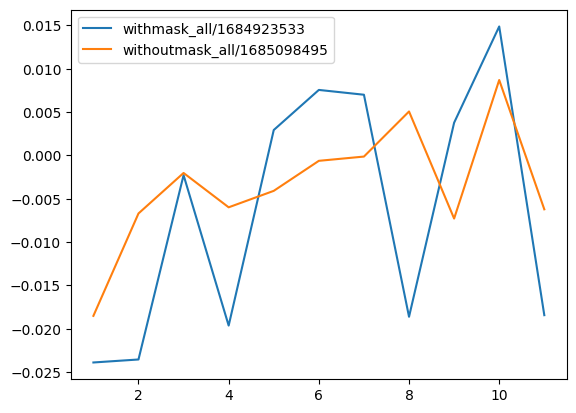

In [3]:

models = ["withmask_all/1684923533", "withoutmask_all/1685098495"]

fig, ax = plt.subplots(nrows=1, ncols=1)
for model in models: 
    report = f"{basename}{model}_train_report.csv"
    train_report = pd.read_csv(report)
    train_diff = train_report['Val loss 2'].diff()
    ax.plot(train_diff, label=model)
ax.legend()

In [39]:
models = ["withmask_each", "withoutmask_each1", "withoutmask_each2"]

all_df = pd.DataFrame()
for model in models:
    files = glob.glob(basename + model + "/*.pt")
    files_df = pd.DataFrame(files, columns=['filepath'])
    files_df['modeltype'] = model
    files_df['model'] = files_df['filepath'].apply(lambda x: os.path.basename(x).split("_")[0])
    files_df['variable'] = files_df['filepath'].apply(lambda x: x.split("_")[-1][0])
    files_df['report'] = files_df['model'].apply(lambda x: os.path.join(basename, model, f"{x}_train_report.csv"))
    # files_df.set_index('variable', inplace=True)

    all_df = pd.concat([all_df, files_df])


# fig, ax = plt.subplots(nrows=1, ncols=1)
# for model in models: 
#     report = f"{basename}/{model}_train_report.csv"
#     train_report = pd.read_csv(report)
#     train_diff = train_report['Val loss 2'].diff()
#     ax.plot(train_diff, label=model)
# ax.legend()

DEM
withmask_each 0.56
withoutmask_each1 0.59
withoutmask_each2 0.59


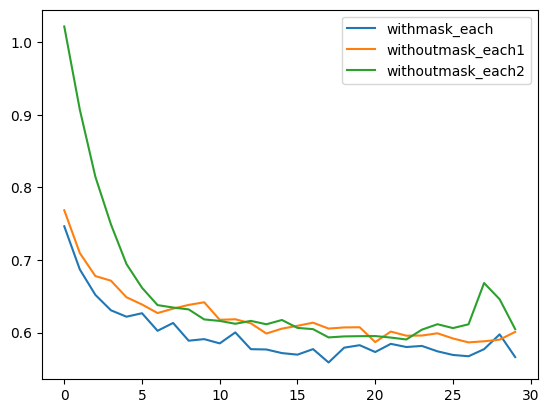

SCE
withmask_each 0.55
withoutmask_each1 0.58
withoutmask_each2 0.57


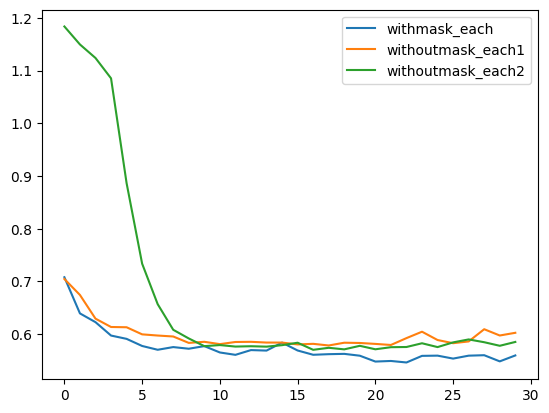

Aspect
withmask_each 0.58
withoutmask_each1 0.74
withoutmask_each2 0.62


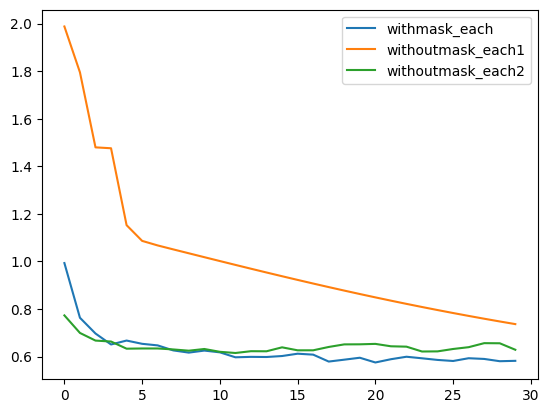

Slope
withmask_each 0.57
withoutmask_each1 0.65
withoutmask_each2 0.64


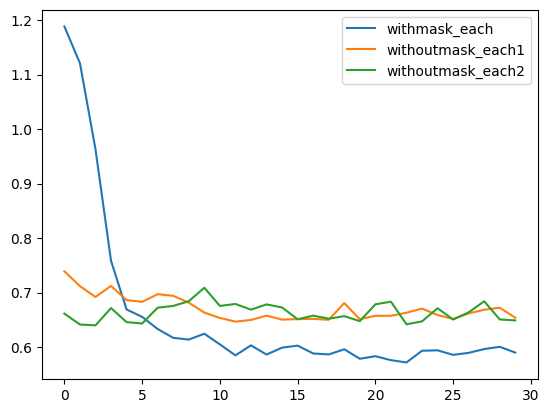

TPI
withmask_each 0.54
withoutmask_each1 0.59
withoutmask_each2 0.61


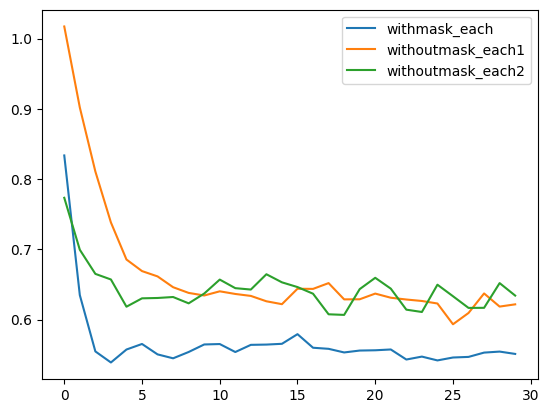

TPIWGW
withmask_each 0.61
withoutmask_each1 0.62
withoutmask_each2 0.6


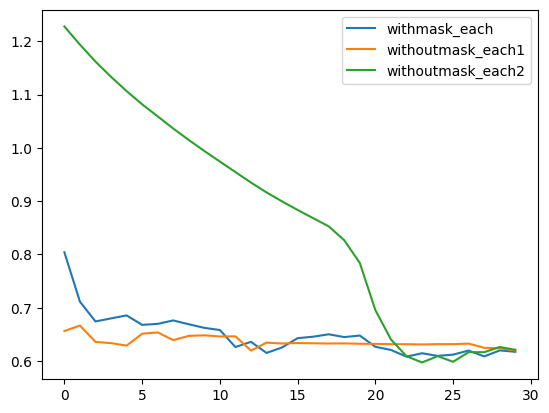

DEMSNOW
withmask_each 0.59
withoutmask_each1 0.73
withoutmask_each2 0.6


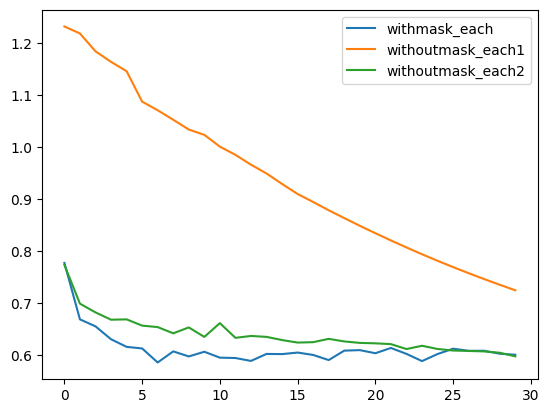

FFSNOW
withmask_each 0.56
withoutmask_each1 0.7
withoutmask_each2 0.6


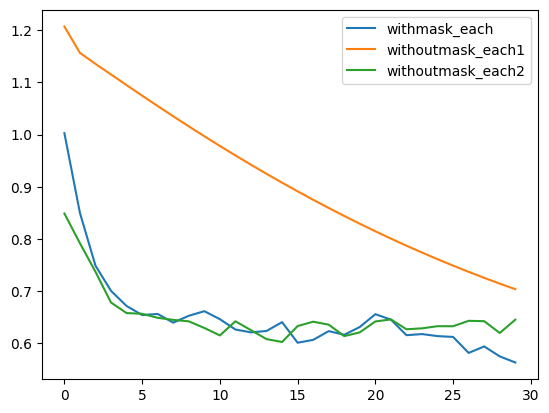

In [40]:
minvars = []
for variable, var_df in all_df.groupby("variable"):
    print(FEATURES[int(variable)])
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for index, series in var_df.iterrows():
        
        train_report = pd.read_csv(series['report'])
        train_diff = train_report['Val loss 2']
        print(series['modeltype'], train_diff.min().round(2))
        ax.plot(train_diff, label=series['modeltype'])
        if series['modeltype'].startswith("without"):
            minvars.append([train_diff.min().round(4), FEATURES[int(variable)]])
    ax.legend()
    plt.show()

In [38]:
list(zip(*sorted(minvars, key=lambda x: x[0])))[1]

('SCE', 'DEM', 'TPI', 'DEMSNOW', 'FFSNOW', 'Aspect', 'TPIWGW', 'Slope')